# Import required libraries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

# unpack the dataset

In [2]:
#load the dataset mnist into variable ojects which is composed of images of resolution 28 * 28 of handwritten digits
objects =  tf.keras.datasets.mnist 
# unpack and load the dataset
(training_images, training_labels), (test_images, test_labels) = objects.load_data()


11501568/11490434 [==============================] - 30s 3us/step


The number of images used for training and testing

In [3]:
len(training_images )

60000

In [4]:
len(test_images)

10000

# Sample images used in training the model

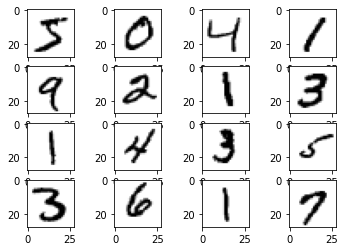

In [5]:
for i in range(16):
    plt.subplot(4,4, i + 1 )
    plt.imshow(training_images[i], cmap = plt.cm.binary)


In [6]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

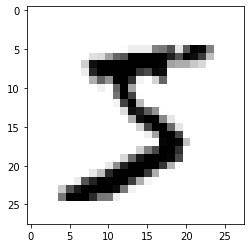

In [7]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Normalization to reduce stress on computation

In [8]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [9]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

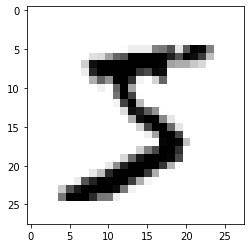

In [10]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Define architecture of the model

In [15]:
# Here the architecure of the model is defined, added a new hidden dense layer

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [17]:
# most go to optimizer is adam, others include stochastic gradient descent
# we gonna calcluate losses using sparse categorica _crossentropy if it were two classes maybe binary categorical crossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Training

In [18]:
# model.fit(training_images, training_labels, epochs=5) tried 15 epoches
history = model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9250
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1104 - accuracy: 0.9668
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0772 - accuracy: 0.9760
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0586 - accuracy: 0.9815
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0462 - accuracy: 0.9853
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0364 - accuracy: 0.9882
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0271 - accuracy: 0.9910
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [19]:
history.history

{'loss': [0.25856778025627136,
  0.11035510897636414,
  0.07723288238048553,
  0.058647189289331436,
  0.04616863653063774,
  0.03635675087571144,
  0.031447991728782654,
  0.027116354554891586,
  0.020046448335051537,
  0.021645717322826385,
  0.01768207550048828,
  0.015099385753273964,
  0.01495713647454977,
  0.013978028669953346,
  0.010830731131136417],
 'accuracy': [0.9249833226203918,
  0.9668166637420654,
  0.9759833216667175,
  0.9815499782562256,
  0.9853333234786987,
  0.9881666898727417,
  0.9900500178337097,
  0.9909833073616028,
  0.9933666586875916,
  0.9924333095550537,
  0.9941333532333374,
  0.994700014591217,
  0.9948999881744385,
  0.995199978351593,
  0.9962666630744934]}

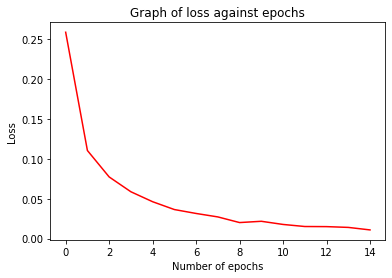

In [21]:
plt.plot(history.history['loss'], c='r' )
plt.title('Graph of loss against epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

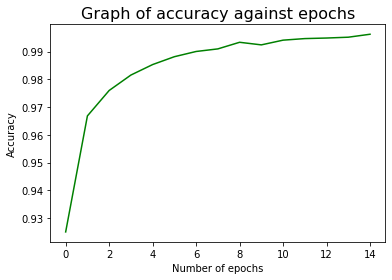

In [22]:
plt.plot(history.history['accuracy'], c='g' )
plt.title('Graph of accuracy against epochs', fontdict={'fontsize':16})
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

# Model evaluation

In [23]:

print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9724
[0.13795185089111328, 0.9724000096321106]


In [24]:
psix = model.predict(test_images[339].reshape(-1,28,28))
test_labels[339], psix.argmax(axis=1), psix.max(axis=1)

(6, array([6], dtype=int64), array([0.80949235], dtype=float32))

In [25]:
six_imgs, six_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 6:
        six_imgs.append(test_images[i])
        six_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(six_imgs), len(six_labels)

(10, 10)

In [26]:
four_imgs, four_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 4:
        print(i)
        four_imgs.append(test_images[i])
        four_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(four_imgs), len(four_labels)

4
6
19
24
27
33
42
48
49
56


(10, 10)

In [27]:
nine_imgs, nine_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 9:
        print(i)
        nine_imgs.append(test_images[i])
        nine_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(nine_imgs), len(nine_labels)

7
9
12
16
20
58
62
73
78
92


(10, 10)

In [28]:
psix[0][8]
print(psix[0])

[7.72045716e-09 1.50639710e-06 1.12655885e-04 5.05904346e-11
 2.46494127e-11 1.90393344e-01 8.09492350e-01 1.45378642e-12
 2.39855922e-07 7.27162566e-11]


<BarContainer object of 10 artists>

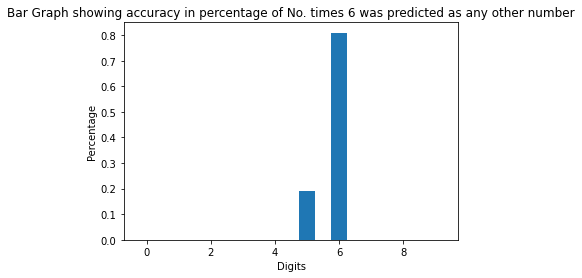

In [29]:
# help(plt.bar)
plt.title("Bar Graph showing accuracy in percentage of No. times 6 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(psix[0]))],psix[0], width=0.5) 

In [30]:
#predicting digit 9
pnine = model.predict(test_images[7].reshape(-1,28,28))
test_labels[7], pnine.argmax(axis=1), pnine.max(axis=1)

(9, array([9], dtype=int64), array([0.9999999], dtype=float32))

<BarContainer object of 10 artists>

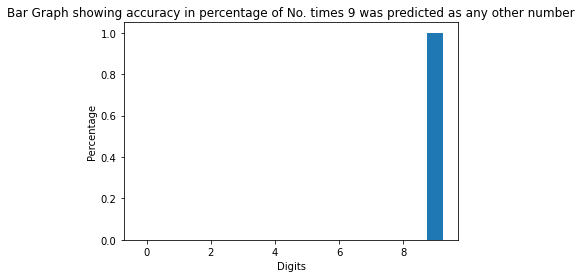

In [31]:
plt.title("Bar Graph showing accuracy in percentage of No. times 9 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pnine[0]))],pnine[0], width=0.5) 

In [32]:
pfour = model.predict(test_images[4].reshape(-1,28,28))
test_labels[4], pfour.argmax(axis=1), pfour.max(axis=1)

(4, array([4], dtype=int64), array([0.9999987], dtype=float32))

<BarContainer object of 10 artists>

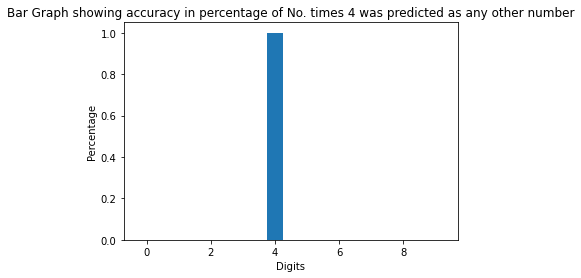

In [33]:
plt.title("Bar Graph showing accuracy in percentage of No. times 4 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pfour[0]))],pfour[0], width=0.5) 

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score

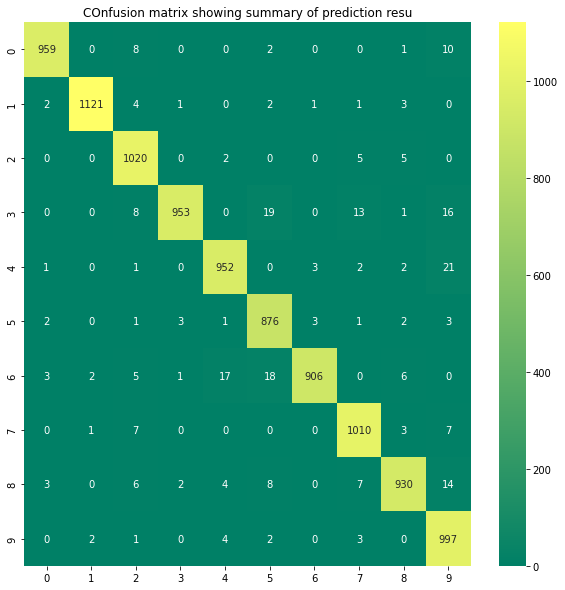

In [35]:
arr = confusion_matrix(test_labels , np.argmax(model.predict(test_images) , axis =1))

plt.figure(figsize=(10 , 10))
sns.heatmap(arr ,
            cmap = 'summer',
            fmt ='g',
            annot=True 
            )
plt.title("COnfusion matrix showing summary of prediction resu")
plt.show()

In [38]:
model.save('mnist_grp1_10.model')

INFO:tensorflow:Assets written to: mnist_grp1_10.model\assets


In [39]:
saved_model = tf.keras.models.load_model('mnist_grp1_10.model')